### Imports

In [28]:
from subprocess import Popen, PIPE, STDOUT
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 
import pdb

### Interfacing with the Java implementation of the Negative Selection algorithm

In [43]:
def get_negsel_outputs(test_filename, train_filename="english.train", 
                       n=10, r=4, c=True, l=True, notebook_in_folder=False):
    
    # Fix command for when notebook is not inside the negative-selection folder
    folder_prefix = "negative-selection/" if not notebook_in_folder else ""
    
    # Create command using given filenames and parameters
    command = f"java -jar {folder_prefix}negsel2.jar " \
              f"-self {folder_prefix}{train_filename} " \
              f"-n {n} -r {r} {'-c' if c else ''} {'-l' if l else ''} " \
              f"< {folder_prefix}{test_filename}"
    
    # Run the command
    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=2, close_fds=True)
    
    # Extract and return output values
    outputs = [float(line.rstrip().decode('utf-8')) for line in iter(process.stdout.readline, b'')]
    return outputs

### Running the algorithm

In [ ]:
english_outputs = get_negsel_outputs("english.test")
tagalog_outputs = get_negsel_outputs("tagalog.test")

In [36]:
np.sum(np.isnan(tagalog_outputs))

0

### Merging Test Sets

In [38]:
# First: Merge two test files:
data = data2 = ""

# Reading data from file1 
with open('negative-selection/english.test') as fp: 
    data = fp.read()
    
# Reading data from file2 
with open('negative-selection/tagalog.test') as fp: 
    data2 = fp.read() 

# Merging 2 files 
# To add the data of file2 
# from next line 
# data += "\n"
data += data2 

with open ('negative-selection/merged.test', 'w') as fp: 
    fp.write(data) 

In [39]:
with open('negative-selection/merged.test') as fp:
    data = fp.read()
print(data)

performing
_the_part_
i_did_besi
des_cajoli
ng_me_into
_the_delus
ion_that_i
t_was_a_ch
oice_resul
ting_from_
my_own_unb
iased_free
will_and_d
iscriminat
ing_judgme
nt_chief_a
mong_these
_motives_w
as_the_ove
rwhelming_
idea_of_th
e_great_wh
ale_himsel
f_such_a_p
ortentous_
and_myster
ious_monst
er_roused_
all_my_cur
iosity_the
n_the_wild
_and_dista
nt_seas_wh
ere_he_rol
led_his_is
land_bulk_
the_undeli
verable_na
meless_per
ils_of_the
_whale_the
se_with_al
l_the_atte
nding_marv
els_of_a_t
housand_pa
tagonian_s
ights_and_
sounds_hel
ped_to_swa
y_me_to_my
_wish_with
_other_men
_perhaps_s
uch_things
_would_not
_have_been
_inducemen
ts_but_as_
for_me_i_a
m_tormente
d_with_an_
everlastin
g_itch_for
_things_re
mote_i_lov
e_to_sail_
forbidden_
seas_and_l
and_on_bar
barous_coa
sts_not_ig
noring_wha
t_is_good_
i_am_quick
_to_percei
ve_a_horro
r_and_coul
d_still_be
_social_wi
th_it_woul
d_they_let
_me_since_
it_is_but_
well_to_be
_on_friend
ly_terms_w
ith_all_th
e_inmates_
of_the_pla
ce_one_lod

In [48]:
a = [1,2,3]
b = [4,5,6]
print( 10)

10


### Computing ROC-AUC

In [49]:
"""
    normal strings = self = english
    anomalous strings = non-self/foreign = tagalog
    
    cut-off score = (each distinct value in anomaly scores list)
    
    
    sensitivity = percentage of anomalous strings higher than cut off score
    specificity = percentage of normal strings lower than cut off score
    
    To calculate AUC you need ROC and for ROC you need TPR and FPR, 
    TPR = sensitivity
    FPR = 1 - specificty
    
    compute AUC 
    1. merge two test string sets (direction not specified..)
    2. sort merged sets
    3. determine cut off scores
    
    4. for each score in cut off scores
        4i. compute sensitivity
        4ii. compute specificity

"""




def roc_auc(r, title = 'Nog Mooiere en Minder Gehandicapte ROC-Curve, Maar Waarschijnlijk Net Zo Fout'):
    sensitivity = []
    specificity = []
    english_outputs = get_negsel_outputs("english.test",r=r)#rrrr
    tagalog_outputs = get_negsel_outputs("tagalog.test",r=r)#rrrr
    merged_outputs = english_outputs + tagalog_outputs
    sorted_merged_outputs = sorted(merged_outputs)
    cut_off_scores = list(set(sorted_merged_outputs))

    for cut_off_score in cut_off_scores:
        # For each cut_off_score in merged_outputs: calculate percentage of values in tagalog that are larger
        sensitivity_v = len([x for x in tagalog_outputs if x > cut_off_score]) / len(tagalog_outputs)

        # For each cut_off_score in merged_outputs: calculate percentage of values in english that are smaller
        specificity_v = len([x for x in english_outputs if x < cut_off_score]) / len(english_outputs)
        
        # Keep track of these values
        sensitivity.append(sensitivity_v)
        specificity.append(specificity_v)
    ## AUC = auc(fpr, tpr) FPR = 1-specicity, TPR = Sensitivity
    ## I think it should be AUC ( specificity, sensitivity)
    FPR = [1 - x for x in specificity]
    plt.plot(sorted(FPR),sorted(sensitivity))
    plt.plot([0.0, 1.0], [0.0,1.0], ls='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('Sensitivity')
    plt.title(title)
    plt.show()
    ## AUC = auc(fpr, tpr) FPR = 1-specicity TPR = Sensitivity
    ## I think it should be AUC ( specificity, sensitivity)
    print("ROC-AUC = {}".format(auc(sorted(FPR),sorted(sensitivity))))

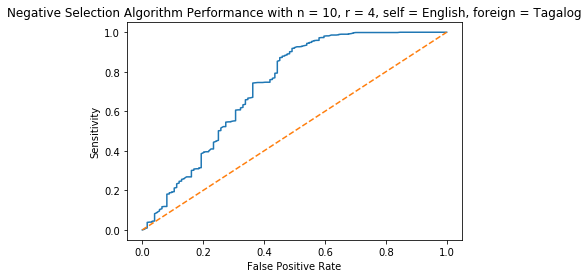

ROC-AUC = 0.72752642609805


In [51]:
# get sorted output on merged test set
# merged_outputs = get_negsel_outputs("merged.test", r = 5)

# get ROC-AUC
roc_auc(r=5, title="Negative Selection Algorithm Performance with n = 10, r = 5, self = English, foreign = Tagalog")

## Assignment 1.1: ROC-AUC with $n$ = 10, $r$ = 4

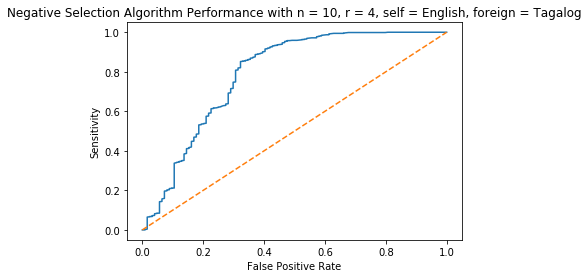

ROC-AUC = 0.7902485420083833


In [18]:
# get sorted output on merged test set
merged_outputs = sorted(get_negsel_outputs("merged.test"))

# get ROC-AUC
roc_auc(merged_outputs, title="Negative Selection Algorithm Performance with n = 10, r = 4, self = English, foreign = Tagalog")

## Assignment 1.2: Influence of $r$

### ROC-AUC with $n$ = 10, $r$ = 1

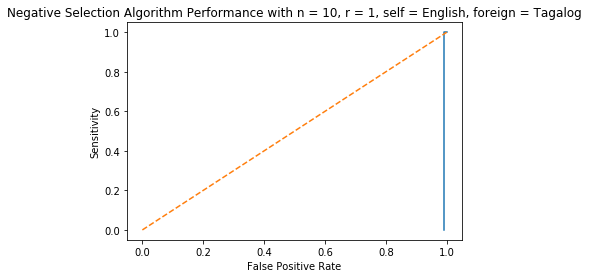

ROC-AUC = 0.008064516129032251


In [25]:
# get sorted output on merged test set
merged_outputs =  get_negsel_outputs("merged.test", r = 1)

# get ROC-AUC
roc_auc(merged_outputs , title="Negative Selection Algorithm Performance with n = 10, r = 1, self = English, foreign = Tagalog")

### ROC-AUC with $n$ = 10, $r$ = 9

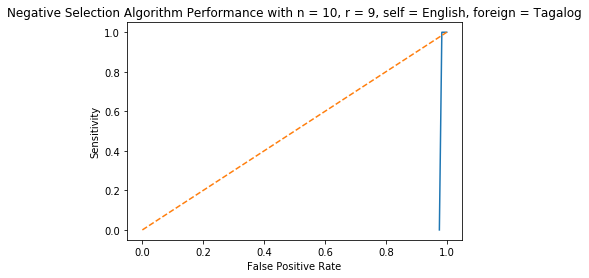

ROC-AUC = 0.020161290322580627


In [54]:
# get sorted output on merged test set

# get ROC-AUC
roc_auc(r=9, title="Negative Selection Algorithm Performance with n = 10, r = 9, self = English, foreign = Tagalog")

## Assignment 1.3: Testing with different languages

### Hiligaynon

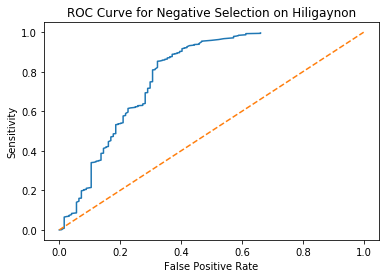

ROC-AUC = 0.45241593767085847


In [21]:
# get sorted output on merged test set
merged_outputs = sorted(get_negsel_outputs("lang/hiligaynon.txt"))

# get ROC-AUC
roc_auc(merged_outputs, title = "ROC Curve for Negative Selection on Hiligaynon")

### Middle-English

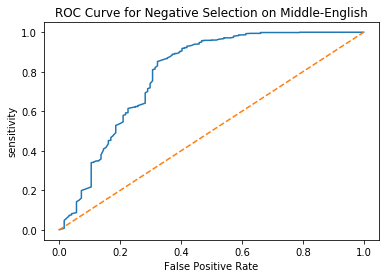

ROC-AUC = 0.7915755421906325


In [49]:
# get sorted output on merged test set
merged_outputs = sorted(get_negsel_outputs("lang/middle-english.txt"))

# get ROC-AUC
roc_auc(merged_outputs, title = "ROC Curve for Negative Selection on Middle-English")

### Plautdietsch

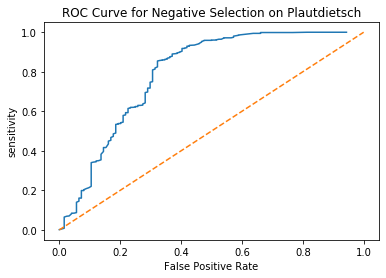

ROC-AUC = 0.7351581009659195


In [50]:
# get sorted output on merged test set
merged_outputs = sorted(get_negsel_outputs("lang/plautdietsch.txt"))

# get ROC-AUC
roc_auc(merged_outputs, title = "ROC Curve for Negative Selection on Plautdietsch")

### Xhosa

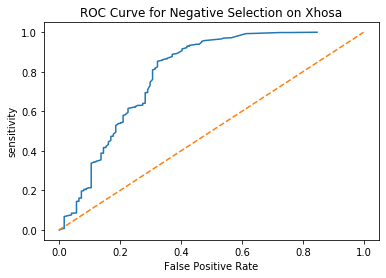

ROC-AUC = 0.6382756971022417


In [51]:
# get sorted output on merged test set
merged_outputs = sorted(get_negsel_outputs("lang/xhosa.txt"))

# get ROC-AUC
roc_auc(merged_outputs, title = "ROC Curve for Negative Selection on Xhosa")

The easiest distinguishable languages that can be discriminated from English are Hiligaynon and Xhosa. While English belgons to the family of Indoeuropean Germanic languages, Hiligaynon and Xhosa belong to the Austronesean and Niger-Congo families respectively. The differences between English and Hiligaynon or Xhose are probably quite large.
The most difficult language to distinguish from English are Plautdietsch and Middle English. Both Plautdietsch and Middle English are Indoeuropean Germanic languages, and they have quite some similarities because of this.